In [2]:
#########--ARRHYTHMIA--#########

In [165]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

import pandas as pd
from pandas.api.types import CategoricalDtype

In [166]:
HEART = pd.read_csv ('arrhythmia.csv', sep = ',', header=0, na_values = '?')
HEART


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [167]:
classifier = HEART["class"].unique()
classifier

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15], dtype=int64)

In [168]:
y = HEART["class"].to_numpy()
X = HEART.drop(['class'], axis = 1).to_numpy()
print(X)
print(y)
print(X.shape, y.shape)

[[ 75.    0.  190.  ...   2.9  23.3  49.4]
 [ 56.    1.  165.  ...   2.1  20.4  38.8]
 [ 54.    0.  172.  ...   3.4  12.3  49. ]
 ...
 [ 36.    0.  166.  ...   1.  -44.2 -33.2]
 [ 32.    1.  155.  ...   2.4  25.   46.6]
 [ 78.    1.  160.  ...   1.6  21.3  32.8]]
[ 8  6 10  1  7 14  1  1  1 10  3  1 10  6  1  1 10  1  1  1  1  1  1  1
  1 16 14 10  2  2  6  1  1  1  4  1  1 10  1  6  1  1  1  1  1  4  5  1
  6  1  1  1 10 16 16  6  1  1  6  1  5  5  1  1  1  1  2  1  6  1  6 16
  1  1  1 10  3  2  1  1  1  1  2  4  6  9  2  4  9  9  1  4  1  5 10  1
 10  1  1  1  4  1  1  1  6  4  6  1  2  1  1  1  1  1  6  1 16  1  1  1
  1  1  1  1  1  1  1 10  1  1  1  1  1  1 10  1  1 10  1  1  1  5  1  1
 10 10 10  1  1 10  1  1  1  6 16  1  1  2  1  1  1  1  1  1  1  1  1  1
  5  4  1  1  1 10 15  6  1  1  1  2  1 16  1  4  2  4  2  2 14  9  1  1
  2  2  1  1  1 16 16  1  2  1  1  1  3  1  1  9  1 10 10  1  2  2  4  1
  2 15  3 16  1  1  6  1 10  3  1 16  1  1  1  4  1  1  1  2  1  2  1  1
  1  1

In [169]:
from autorank import autorank, create_report, plot_stats, latex_table

n_features = X.shape[1]
n_classes = len(np.unique(y))
print(n_features, n_classes)

279 13


In [170]:
seed = 333
testseed = 333
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

print(X_train.shape, X_test.shape)

(361, 279) (91, 279)


In [171]:
#DATA CLEANING

dataset = pd.DataFrame(HEART)

#print(dataset[dataset.duplicated()])

TrainingArray = pd.DataFrame(X_train)
TestArray = pd.DataFrame(X_test) 
 
TrainingArray.drop(columns = [13], axis = 1, inplace = True)
TestArray.drop(columns = [13], axis = 1, inplace = True)

TrainingArray.fillna(TrainingArray.mean(), inplace = True)
TestArray.fillna(TrainingArray.mean(), inplace = True)


In [172]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

decisionTree = DecisionTreeClassifier(random_state = seed)
multi = RepeatedKFold(n_splits = 10, random_state = testseed)
multiStrat = RepeatedStratifiedKFold(n_splits = 2, random_state = testseed)

DecisionTreeMeans = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(decisionTree, TrainingArray, y_train, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    DecisionTreeMeans.append(score)
    
print(DecisionTreeMeans)

DecisionTree1Score = np.mean(DecisionTreeMeans)

DecisionTreeSDframe = pd.DataFrame(DecisionTreeMeans)
DecisionTree1SD = DecisionTreeSDframe.std()


print("Decision Tree mean for Arrythmia Dataset is: ", DecisionTree1Score)

RepeatedKFold Mean test accuracy: 63.155%

0.6315540540540541
RepeatedKFold Mean test accuracy: 62.216%

0.6221621621621621
RepeatedKFold Mean test accuracy: 62.697%

0.6269669669669669
RepeatedKFold Mean test accuracy: 63.151%

0.631509009009009
RepeatedKFold Mean test accuracy: 63.461%

0.6346096096096097
RepeatedKFold Mean test accuracy: 62.216%

0.6221621621621622
RepeatedKFold Mean test accuracy: 64.064%

0.6406381381381382
RepeatedKFold Mean test accuracy: 63.046%

0.630457957957958
RepeatedKFold Mean test accuracy: 63.459%

0.6345945945945946
RepeatedKFold Mean test accuracy: 62.835%

0.6283483483483484
[0.6315540540540541, 0.6221621621621621, 0.6269669669669669, 0.631509009009009, 0.6346096096096097, 0.6221621621621622, 0.6406381381381382, 0.630457957957958, 0.6345945945945946, 0.6283483483483484]
Decision Tree mean for Arrythmia Dataset is:  0.6303003003003004


In [173]:
from sklearn.tree import plot_tree

chosenTree = DecisionTreeClassifier(random_state= seed)
chosenTree.fit(TrainingArray, y_train)
predicted = chosenTree.predict(TestArray)
print(accuracy_score(y_test, predicted))

score = chosenTree.score(TrainingArray, y_train)
print(f'Accuracy on training set: {score*100:.2f}%')
score = chosenTree.score(TestArray, y_test)
print(f'Accuracy on test set: {score*100:.2f}%')


0.6703296703296703
Accuracy on training set: 100.00%
Accuracy on test set: 67.03%


In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

randomForest = RandomForestClassifier(n_estimators = 10, random_state = seed)
randomForest.fit(TrainingArray, y_train)

score = randomForest.score(TrainingArray, y_train)
print(f'Accuracy on training set: {score*100:.2f}%')
score = randomForest.score(TestArray, y_test)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Accuracy on training set: 98.06%
Accuracy on test set: 62.64%



In [175]:

randomForestMeans = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(randomForest, TrainingArray, y_train, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    randomForestMeans.append(score)
    
print(randomForestMeans)

randomForest1Score = np.mean(randomForestMeans)

randomForest1SDframe = pd.DataFrame(randomForestMeans)
randomForest1SD = randomForest1SDframe.std()

print("Random Forest mean for Arrythmia Dataset is: ", randomForest1Score)

RepeatedKFold Mean test accuracy: 69.974%

0.6997372372372372
RepeatedKFold Mean test accuracy: 69.336%

0.6933633633633635
RepeatedKFold Mean test accuracy: 69.432%

0.6943243243243243
RepeatedKFold Mean test accuracy: 69.724%

0.6972372372372371
RepeatedKFold Mean test accuracy: 70.002%

0.7000225225225226
RepeatedKFold Mean test accuracy: 70.110%

0.701096096096096
RepeatedKFold Mean test accuracy: 69.885%

0.6988513513513513
RepeatedKFold Mean test accuracy: 69.591%

0.6959084084084084
RepeatedKFold Mean test accuracy: 70.382%

0.7038213213213212
RepeatedKFold Mean test accuracy: 69.755%

0.697545045045045
[0.6997372372372372, 0.6933633633633635, 0.6943243243243243, 0.6972372372372371, 0.7000225225225226, 0.701096096096096, 0.6988513513513513, 0.6959084084084084, 0.7038213213213212, 0.697545045045045]
Random Forest mean for Arrythmia Dataset is:  0.6981906906906907


In [176]:
predictedForest = randomForest.predict(TestArray)
print(f"Random Forest Accuracy:  {accuracy_score(y_test, predictedForest)*100:.3f}%")

Random Forest Accuracy:  62.637%


In [177]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

Boost = AdaBoostClassifier(n_estimators = 10, random_state = seed)
Boost.fit(TrainingArray, y_train)

score = Boost.score(TrainingArray, y_train)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Boost.score(TestArray, y_test)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Accuracy on training set: 63.16%
Accuracy on test set: 59.34%



In [178]:


AdaBoostMeans = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Boost, TrainingArray, y_train, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    AdaBoostMeans.append(score)
    
print(AdaBoostMeans)

AdaBoost1Score = np.mean(AdaBoostMeans)

AdaBoost1SDframe = pd.DataFrame(AdaBoostMeans)
AdaBoost1SD = AdaBoost1SDframe.std()

print("ADABoost mean for Arrythmia Dataset is: ", AdaBoost1Score)

RepeatedKFold Mean test accuracy: 59.617%

0.5961711711711711
RepeatedKFold Mean test accuracy: 59.311%

0.5931081081081081
RepeatedKFold Mean test accuracy: 59.206%

0.5920645645645645
RepeatedKFold Mean test accuracy: 59.359%

0.5935885885885885
RepeatedKFold Mean test accuracy: 59.361%

0.5936111111111111
RepeatedKFold Mean test accuracy: 59.590%

0.595900900900901
RepeatedKFold Mean test accuracy: 59.252%

0.5925225225225226
RepeatedKFold Mean test accuracy: 59.809%

0.5980930930930931
RepeatedKFold Mean test accuracy: 59.583%

0.5958258258258259
RepeatedKFold Mean test accuracy: 59.335%

0.5933483483483485
[0.5961711711711711, 0.5931081081081081, 0.5920645645645645, 0.5935885885885885, 0.5936111111111111, 0.595900900900901, 0.5925225225225226, 0.5980930930930931, 0.5958258258258259, 0.5933483483483485]
ADABoost mean for Arrythmia Dataset is:  0.5944234234234235


In [179]:
predictedAdaBoost = Boost.predict(TestArray)
print(f"AdaBoost Accuracy:  {accuracy_score(y_test, predictedAdaBoost)*100:.3f}%")

AdaBoost Accuracy:  59.341%


In [217]:
from sklearn.ensemble import BaggingClassifier

Baggin = BaggingClassifier(n_estimators =10, random_state = seed)
Baggin.fit(TrainingArray, y_train)

score = Baggin.score(TrainingArray, y_train)
print(f'Accuracy on training set: {score*100:.2f}%')
score4 = Baggin.score(TestArray, y_test)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Accuracy on training set: 97.51%
Accuracy on test set: 97.51%



In [181]:

BaggingMeans = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Baggin, TrainingArray, y_train, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    BaggingMeans.append(score)
    
print(BaggingMeans)

Bagging1Score = np.mean(BaggingMeans)

Bagging1SDframe = pd.DataFrame(BaggingMeans)
Bagging1SD = Bagging1SDframe.std()

print("Bagging mean for Arrythmia Dataset is: ", Bagging1Score)

RepeatedKFold Mean test accuracy: 73.162%

0.7316216216216215
RepeatedKFold Mean test accuracy: 72.693%

0.7269294294294295
RepeatedKFold Mean test accuracy: 73.169%

0.7316891891891892
RepeatedKFold Mean test accuracy: 73.511%

0.7351126126126126
RepeatedKFold Mean test accuracy: 72.578%

0.7257807807807808
RepeatedKFold Mean test accuracy: 72.989%

0.729894894894895
RepeatedKFold Mean test accuracy: 72.550%

0.7255030030030032
RepeatedKFold Mean test accuracy: 72.662%

0.7266216216216216
RepeatedKFold Mean test accuracy: 72.518%

0.7251801801801803
RepeatedKFold Mean test accuracy: 73.242%

0.7324249249249247
[0.7316216216216215, 0.7269294294294295, 0.7316891891891892, 0.7351126126126126, 0.7257807807807808, 0.729894894894895, 0.7255030030030032, 0.7266216216216216, 0.7251801801801803, 0.7324249249249247]
Bagging mean for Arrythmia Dataset is:  0.7290758258258259


In [218]:
predictedBagging = Baggin.predict(TestArray)
print(f"Bagging Accuracy:  {accuracy_score(y_test, predictedBagging)*100:.3f}%")

Bagging Accuracy:  69.231%


In [219]:
GradientBooster = GradientBoostingClassifier(n_estimators = 10, random_state = seed)
GradientBooster.fit(TrainingArray, y_train)

score = GradientBooster.score(TrainingArray, y_train)
print(f'Accuracy on training set: {score*100:.2f}%')
score = GradientBooster.score(TestArray, y_test)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Accuracy on training set: 94.74%
Accuracy on test set: 70.33%



In [183]:

GradientBoosterMeans = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(GradientBooster, TrainingArray, y_train, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    GradientBoosterMeans.append(score)
    
print(GradientBoosterMeans)

GradientBooster1Score = np.mean(GradientBoosterMeans)

GradientBooster1SDframe = pd.DataFrame(GradientBoosterMeans)
GradientBooster1SD = GradientBooster1SDframe.std()

print("GradientBoost mean for Arrythmia Dataset is: ", GradientBooster1Score)

Accuracy on training set: 94.74%
Accuracy on test set: 70.33%

RepeatedKFold Mean test accuracy: 67.282%

0.6728153153153152
RepeatedKFold Mean test accuracy: 66.982%

0.66981981981982
RepeatedKFold Mean test accuracy: 67.878%

0.6787762762762763
RepeatedKFold Mean test accuracy: 67.146%

0.671463963963964
RepeatedKFold Mean test accuracy: 67.231%

0.6723123123123125
RepeatedKFold Mean test accuracy: 67.312%

0.6731156156156156
RepeatedKFold Mean test accuracy: 68.024%

0.6802402402402403
RepeatedKFold Mean test accuracy: 68.069%

0.6806906906906905
RepeatedKFold Mean test accuracy: 67.339%

0.6733933933933934
RepeatedKFold Mean test accuracy: 67.517%

0.6751726726726729
[0.6728153153153152, 0.66981981981982, 0.6787762762762763, 0.671463963963964, 0.6723123123123125, 0.6731156156156156, 0.6802402402402403, 0.6806906906906905, 0.6733933933933934, 0.6751726726726729]
GradientBoost mean for Arrythmia Dataset is:  0.6747800300300301


In [220]:
predictedGradBoosting = GradientBooster.predict(TestArray)
print(f"Bagging Accuracy:  {accuracy_score(y_test, predictedGradBoosting)*100:.3f}%")

Bagging Accuracy:  70.330%


In [214]:
########### CAESARIAN ###########

In [221]:
BIRTH = pd.read_csv ('caesarian.csv', sep = ',', header=0, na_values = '?')
#BIRTH.iloc[47]

In [222]:
classifier = BIRTH["class"].unique()
classifier

array([0, 1], dtype=int64)

In [223]:
y2 = BIRTH["class"].to_numpy()
X2 = BIRTH.drop(['class'], axis = 1).to_numpy()

print(X2.shape, y2.shape)

(80, 5) (80,)


In [224]:
n_features = X2.shape[1]
n_classes = len(np.unique(y2))
print(n_features, n_classes)

5 2


In [225]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state = seed)

print(X_train2.shape, X_test2.shape)
print(y_train2)

(64, 5) (16, 5)
[1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0]


In [226]:
TrainingArray2 = pd.DataFrame(X_train2)
TestArray2 = pd.DataFrame(X_test2) 

In [227]:
decisionTree = DecisionTreeClassifier(random_state = seed)
decisionTree.fit(TrainingArray2, y_train2)

decisionTree2Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(decisionTree, TrainingArray2, y_train2, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    decisionTree2Means.append(score)
    
print(decisionTree2Means)

decisionTree2Score = np.mean(decisionTree2Means)

decisionTree2SDframe = pd.DataFrame(decisionTree2Means)
decisionTree2SD = decisionTree2SDframe.std()

print("Decision Tree mean for Caesarian Dataset is: ", decisionTree2Score)

RepeatedKFold Mean test accuracy: 58.548%

0.5854761904761905
RepeatedKFold Mean test accuracy: 57.833%

0.5783333333333334
RepeatedKFold Mean test accuracy: 59.595%

0.5959523809523809
RepeatedKFold Mean test accuracy: 57.143%

0.5714285714285714
RepeatedKFold Mean test accuracy: 58.238%

0.5823809523809523
RepeatedKFold Mean test accuracy: 61.595%

0.615952380952381
RepeatedKFold Mean test accuracy: 60.310%

0.6030952380952381
RepeatedKFold Mean test accuracy: 59.095%

0.5909523809523809
RepeatedKFold Mean test accuracy: 60.071%

0.6007142857142856
RepeatedKFold Mean test accuracy: 58.143%

0.5814285714285714
[0.5854761904761905, 0.5783333333333334, 0.5959523809523809, 0.5714285714285714, 0.5823809523809523, 0.615952380952381, 0.6030952380952381, 0.5909523809523809, 0.6007142857142856, 0.5814285714285714]
Decision Tree mean for Caesarian Dataset is:  0.5905714285714285


In [228]:
predicted = decisionTree.predict(TestArray2)
print(f"Decision Tree Accuracy:  {accuracy_score(y_test2, predicted)*100:.3f}%")

score = decisionTree.score(TrainingArray2, y_train2)
print(f'Accuracy on training set: {score*100:.2f}%')
score = decisionTree.score(TestArray2, y_test2)
print(f'Accuracy on test set: {score*100:.2f}%')


Decision Tree Accuracy:  50.000%
Accuracy on training set: 98.44%
Accuracy on test set: 50.00%


In [229]:
randomForest = RandomForestClassifier(n_estimators = 10, random_state = seed)
randomForest.fit(TrainingArray2, y_train2)

score = randomForest.score(TrainingArray2, y_train2)
print(f'Accuracy on training set: {score*100:.2f}%')
score = randomForest.score(TestArray2, y_test2)
print(f'Accuracy on test set: {score*100:.2f}%\n')

randomForest2Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(randomForest, TrainingArray2, y_train2, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    randomForest2Means.append(score)
    
print(randomForest2Means)

randomForest2Score = np.mean(randomForest2Means)

randomForest2SDframe = pd.DataFrame(randomForest2Means)
randomForest2SD = randomForest2SDframe.std()

print("RandomForest mean for Caesarian Dataset is: ", randomForest2Score)

Accuracy on training set: 95.31%
Accuracy on test set: 50.00%

RepeatedKFold Mean test accuracy: 58.881%

0.5888095238095239
RepeatedKFold Mean test accuracy: 56.381%

0.5638095238095238
RepeatedKFold Mean test accuracy: 59.905%

0.5990476190476189
RepeatedKFold Mean test accuracy: 60.262%

0.6026190476190475
RepeatedKFold Mean test accuracy: 58.214%

0.582142857142857
RepeatedKFold Mean test accuracy: 61.119%

0.6111904761904762
RepeatedKFold Mean test accuracy: 59.500%

0.595
RepeatedKFold Mean test accuracy: 59.905%

0.5990476190476192
RepeatedKFold Mean test accuracy: 60.429%

0.6042857142857143
RepeatedKFold Mean test accuracy: 56.929%

0.5692857142857143
[0.5888095238095239, 0.5638095238095238, 0.5990476190476189, 0.6026190476190475, 0.582142857142857, 0.6111904761904762, 0.595, 0.5990476190476192, 0.6042857142857143, 0.5692857142857143]
RandomForest mean for Caesarian Dataset is:  0.5915238095238095


In [230]:
predictedForest = randomForest.predict(TestArray2)
print(f"Random Forest Accuracy:  {accuracy_score(y_test2, predictedForest)*100:.3f}%")

Random Forest Accuracy:  50.000%


In [231]:
Boost = AdaBoostClassifier(n_estimators = 10, random_state = seed)
Boost.fit(TrainingArray2, y_train2)

score = Boost.score(TrainingArray2, y_train2)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Boost.score(TestArray2, y_test2)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Boost2Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Boost, TrainingArray2, y_train2, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Boost2Means.append(score)
    
print(Boost2Means)

Boost2Score = np.mean(Boost2Means)

Boost2SDframe = pd.DataFrame(Boost2Means)
Boost2SD = Boost2SDframe.std()

print("ADABoost mean for Caesarian Dataset is: ", Boost2Score)

Accuracy on training set: 78.12%
Accuracy on test set: 50.00%

RepeatedKFold Mean test accuracy: 66.429%

0.6642857142857143
RepeatedKFold Mean test accuracy: 65.667%

0.6566666666666666
RepeatedKFold Mean test accuracy: 66.333%

0.6633333333333334
RepeatedKFold Mean test accuracy: 64.714%

0.6471428571428571
RepeatedKFold Mean test accuracy: 65.405%

0.654047619047619
RepeatedKFold Mean test accuracy: 66.905%

0.6690476190476189
RepeatedKFold Mean test accuracy: 66.190%

0.6619047619047618
RepeatedKFold Mean test accuracy: 65.286%

0.6528571428571428
RepeatedKFold Mean test accuracy: 66.143%

0.6614285714285714
RepeatedKFold Mean test accuracy: 65.381%

0.6538095238095238
[0.6642857142857143, 0.6566666666666666, 0.6633333333333334, 0.6471428571428571, 0.654047619047619, 0.6690476190476189, 0.6619047619047618, 0.6528571428571428, 0.6614285714285714, 0.6538095238095238]
ADABoost mean for Caesarian Dataset is:  0.6584523809523809


In [232]:
predictedAdaBoost = Boost.predict(TestArray2)
print(f"AdaBoost Accuracy:  {accuracy_score(y_test2, predictedAdaBoost)*100:.3f}%")

AdaBoost Accuracy:  50.000%


In [233]:
Baggin = BaggingClassifier(n_estimators = 10, random_state = seed)
Baggin.fit(TrainingArray2, y_train2)

score = Baggin.score(TrainingArray2, y_train2)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Baggin.score(TestArray2, y_test2)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Bagging2Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Baggin, TrainingArray2, y_train2, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Bagging2Means.append(score)
    
print(Bagging2Means)

Bagging2Score = np.mean(Bagging2Means)

Bagging2SDframe = pd.DataFrame(Bagging2Means)
Bagging2SD = Bagging2SDframe.std()

print("Bagging mean for Caesarian Dataset is: ", Bagging2Score)

Accuracy on training set: 93.75%
Accuracy on test set: 37.50%

RepeatedKFold Mean test accuracy: 56.690%

0.5669047619047618
RepeatedKFold Mean test accuracy: 56.119%

0.5611904761904761
RepeatedKFold Mean test accuracy: 59.667%

0.5966666666666667
RepeatedKFold Mean test accuracy: 60.810%

0.6080952380952379
RepeatedKFold Mean test accuracy: 58.119%

0.5811904761904763
RepeatedKFold Mean test accuracy: 59.286%

0.5928571428571429
RepeatedKFold Mean test accuracy: 59.262%

0.5926190476190475
RepeatedKFold Mean test accuracy: 56.833%

0.5683333333333334
RepeatedKFold Mean test accuracy: 58.881%

0.5888095238095238
RepeatedKFold Mean test accuracy: 59.548%

0.5954761904761905
[0.5669047619047618, 0.5611904761904761, 0.5966666666666667, 0.6080952380952379, 0.5811904761904763, 0.5928571428571429, 0.5926190476190475, 0.5683333333333334, 0.5888095238095238, 0.5954761904761905]
Bagging mean for Caesarian Dataset is:  0.5852142857142857


In [234]:
predictedBagging = Baggin.predict(TestArray2)
print(f"Bagging Accuracy:  {accuracy_score(y_test2, predictedBagging)*100:.3f}%")

Bagging Accuracy:  37.500%


In [235]:
GradientBooster = GradientBoostingClassifier(n_estimators = 10, random_state = seed)
GradientBooster.fit(TrainingArray2, y_train2)

score = GradientBooster.score(TrainingArray2, y_train2)
print(f'Accuracy on training set: {score*100:.2f}%')
score = GradientBooster.score(TestArray2, y_test2)
print(f'Accuracy on test set: {score*100:.2f}%\n')

GradientBooster2Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(GradientBooster, TrainingArray2, y_train2, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    GradientBooster2Means.append(score)
    
print(GradientBooster2Means)

GradientBooster2Score = np.mean(GradientBooster2Means)

GradientBooster2SDframe = pd.DataFrame(GradientBooster2Means)
GradientBooster2SD = GradientBooster2SDframe.std()

print("GradientBoost mean for Caesarian Dataset is: ", GradientBooster2Score)

Accuracy on training set: 84.38%
Accuracy on test set: 56.25%

RepeatedKFold Mean test accuracy: 60.333%

0.6033333333333333
RepeatedKFold Mean test accuracy: 60.667%

0.6066666666666666
RepeatedKFold Mean test accuracy: 62.738%

0.6273809523809524
RepeatedKFold Mean test accuracy: 62.667%

0.6266666666666666
RepeatedKFold Mean test accuracy: 61.738%

0.6173809523809524
RepeatedKFold Mean test accuracy: 61.881%

0.6188095238095238
RepeatedKFold Mean test accuracy: 63.381%

0.6338095238095238
RepeatedKFold Mean test accuracy: 62.524%

0.6252380952380953
RepeatedKFold Mean test accuracy: 60.786%

0.6078571428571429
RepeatedKFold Mean test accuracy: 62.214%

0.6221428571428571
[0.6033333333333333, 0.6066666666666666, 0.6273809523809524, 0.6266666666666666, 0.6173809523809524, 0.6188095238095238, 0.6338095238095238, 0.6252380952380953, 0.6078571428571429, 0.6221428571428571]
GradientBoost mean for Caesarian Dataset is:  0.6189285714285715


In [236]:
predictedGradBoosting = GradientBooster.predict(TestArray2)
print(f"Bagging Accuracy:  {accuracy_score(y_test2, predictedBagging)*100:.3f}%")

Bagging Accuracy:  37.500%


In [237]:
############# WEBSITE PHISHING #############

In [238]:
SCAM = pd.read_csv ('website-phishing.csv', sep = ',', header=0, na_values = '?')
SCAM

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [239]:
classifier = SCAM["  Class "].unique()
classifier

array([-1,  1], dtype=int64)

In [240]:
y3 = SCAM["  Class "].to_numpy()
X3 = SCAM.drop(['  Class '], axis = 1).to_numpy()


print(X3.shape, y3.shape)

(11055, 30) (11055,)


In [241]:
n_features = X3.shape[1]
n_classes = len(np.unique(y3))
print(n_features, n_classes)

30 2


In [242]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state = seed)

print(X_train3.shape, X_test3.shape)
print(y_train3)

(8844, 30) (2211, 30)
[ 1  1 -1 ...  1 -1 -1]


In [243]:
TrainingArray3 = pd.DataFrame(X_train3)
TestArray3 = pd.DataFrame(X_test3) 

In [244]:
decisionTree = DecisionTreeClassifier(random_state = seed)
decisionTree.fit(TrainingArray3, y_train3)

decisionTree3Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(decisionTree, TrainingArray3, y_train3, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    decisionTree3Means.append(score)
    
print(decisionTree3Means)

decisionTree3Score = np.mean(decisionTree3Means)

decisionTree3SDframe = pd.DataFrame(decisionTree3Means)
decisionTree3SD = decisionTree3SDframe.std()

print("Decision Tree mean for Phishing Dataset is: ", decisionTree3Score)

RepeatedKFold Mean test accuracy: 96.290%

0.9629015773193239
RepeatedKFold Mean test accuracy: 96.200%

0.96199690671575
RepeatedKFold Mean test accuracy: 96.226%

0.9622576756908761
RepeatedKFold Mean test accuracy: 96.202%

0.9620190454278188
RepeatedKFold Mean test accuracy: 96.227%

0.9622681442850934
RepeatedKFold Mean test accuracy: 96.316%

0.9631617583147992
RepeatedKFold Mean test accuracy: 96.286%

0.9628562773218805
RepeatedKFold Mean test accuracy: 96.263%

0.962630186363985
RepeatedKFold Mean test accuracy: 96.270%

0.9626982897461461
RepeatedKFold Mean test accuracy: 96.185%

0.9618501802285452
[0.9629015773193239, 0.96199690671575, 0.9622576756908761, 0.9620190454278188, 0.9622681442850934, 0.9631617583147992, 0.9628562773218805, 0.962630186363985, 0.9626982897461461, 0.9618501802285452]
Decision Tree mean for Phishing Dataset is:  0.9624640041414219


In [245]:
predicted = decisionTree.predict(TestArray3)
print(f"Decision Tree Accuracy:  {accuracy_score(y_test3, predicted)*100:.3f}%")

score = decisionTree.score(TrainingArray3, y_train3)
print(f'Accuracy on training set: {score*100:.2f}%')
score = decisionTree.score(TestArray3, y_test3)
print(f'Accuracy on test set: {score*100:.2f}%')

Decision Tree Accuracy:  95.839%
Accuracy on training set: 99.12%
Accuracy on test set: 95.84%


In [274]:
randomForest = RandomForestClassifier(n_estimators = 10, random_state = seed)
randomForest.fit(TrainingArray3, y_train3)


score = randomForest.score(TrainingArray3, y_train3)
print(f'Accuracy on training set: {score*100:.2f}%')
score = randomForest.score(TestArray3, y_test3)
print(f'Accuracy on test set: {score*100:.2f}%\n')

randomForest3Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(randomForest, TrainingArray3, y_train3, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    randomForest3Means.append(score)
    
print(randomForest3Means)

randomForest3Score = np.mean(randomForest3Means)

randomForest3SDframe = pd.DataFrame(randomForest3Means)
randomForest3SD = randomForest3SDframe.std()

print("RandomForest mean for Phishing Dataset is: ", randomForest3Score)

Accuracy on training set: 99.06%
Accuracy on test set: 96.56%

RepeatedKFold Mean test accuracy: 96.957%

0.9695732545951887
RepeatedKFold Mean test accuracy: 96.901%

0.9690068768054811
RepeatedKFold Mean test accuracy: 96.973%

0.9697312932995885
RepeatedKFold Mean test accuracy: 96.904%

0.9690406089424034
RepeatedKFold Mean test accuracy: 96.923%

0.96923358130736
RepeatedKFold Mean test accuracy: 96.937%

0.9693689061022062
RepeatedKFold Mean test accuracy: 96.930%

0.9693013651353631
RepeatedKFold Mean test accuracy: 96.956%

0.9695612393588465
RepeatedKFold Mean test accuracy: 96.901%

0.969007349745635
RepeatedKFold Mean test accuracy: 96.924%

0.9692445867525629
[0.9695732545951887, 0.9690068768054811, 0.9697312932995885, 0.9690406089424034, 0.96923358130736, 0.9693689061022062, 0.9693013651353631, 0.9695612393588465, 0.969007349745635, 0.9692445867525629]
RandomForest mean for Phishing Dataset is:  0.9693069062044636


In [275]:
predicted = randomForest.predict(TestArray3)
print(f"Decision Tree Accuracy:  {accuracy_score(y_test3, predicted)*100:.3f}%")

Decision Tree Accuracy:  96.563%


In [247]:
Boost = AdaBoostClassifier(n_estimators = 10, random_state = seed)
Boost.fit(TrainingArray3, y_train3)

score = Boost.score(TrainingArray3, y_train3)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Boost.score(TestArray3, y_test3)
print(f'Accuracy on test set: {score*100:.2f}%\n')

AdaBoost3Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Boost, TrainingArray3, y_train3, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    AdaBoost3Means.append(score)
    
print(AdaBoost3Means)

ADABoost3Score = np.mean(AdaBoost3Means)

AdaBoost3SDframe = pd.DataFrame(AdaBoost3Means)
AdaBoost3SD = AdaBoost3SDframe.std()

print("ADABoost mean for Phishing Dataset is: ", ADABoost3Score)

Accuracy on training set: 93.09%
Accuracy on test set: 92.40%

RepeatedKFold Mean test accuracy: 93.058%

0.9305754403456298
RepeatedKFold Mean test accuracy: 93.045%

0.9304497788685225
RepeatedKFold Mean test accuracy: 93.034%

0.9303369123399032
RepeatedKFold Mean test accuracy: 93.030%

0.9303024132730016
RepeatedKFold Mean test accuracy: 93.010%

0.9300999565406346
RepeatedKFold Mean test accuracy: 93.041%

0.9304050796328961
RepeatedKFold Mean test accuracy: 93.024%

0.9302356264539714
RepeatedKFold Mean test accuracy: 93.025%

0.9302461973055194
RepeatedKFold Mean test accuracy: 93.038%

0.9303828386634967
RepeatedKFold Mean test accuracy: 93.043%

0.9304272439092978
[0.9305754403456298, 0.9304497788685225, 0.9303369123399032, 0.9303024132730016, 0.9300999565406346, 0.9304050796328961, 0.9302356264539714, 0.9302461973055194, 0.9303828386634967, 0.9304272439092978]
ADABoost mean for Phishing Dataset is:  0.9303461487332874


In [248]:
Baggin = BaggingClassifier(n_estimators = 10, random_state = seed)
Baggin.fit(TrainingArray3, y_train3)

score = Baggin.score(TrainingArray3, y_train3)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Baggin.score(TestArray3, y_test3)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Bagging3Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Baggin, TrainingArray3, y_train3, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Bagging3Means.append(score)
    
print(Bagging3Means)

Bagging3Score = np.mean(Bagging3Means)

Bagging3SDframe = pd.DataFrame(Bagging3Means)
Bagging3SD = Bagging3SDframe.std()

print("Bagging mean for Phishing Dataset is: ", Bagging3Score)

Accuracy on training set: 98.99%
Accuracy on test set: 96.47%

RepeatedKFold Mean test accuracy: 96.759%

0.967594370733952
RepeatedKFold Mean test accuracy: 96.712%

0.9671185290282998
RepeatedKFold Mean test accuracy: 96.756%

0.9675607919830251
RepeatedKFold Mean test accuracy: 96.704%

0.9670394202009355
RepeatedKFold Mean test accuracy: 96.724%

0.9672437942582509
RepeatedKFold Mean test accuracy: 96.687%

0.9668704271799983
RepeatedKFold Mean test accuracy: 96.727%

0.9672662397423116
RepeatedKFold Mean test accuracy: 96.772%

0.9677182938364394
RepeatedKFold Mean test accuracy: 96.728%

0.9672776669990029
RepeatedKFold Mean test accuracy: 96.724%

0.9672431934964338
[0.967594370733952, 0.9671185290282998, 0.9675607919830251, 0.9670394202009355, 0.9672437942582509, 0.9668704271799983, 0.9672662397423116, 0.9677182938364394, 0.9672776669990029, 0.9672431934964338]
Bagging mean for Phishing Dataset is:  0.9672932727458647


In [249]:
GradientBooster = GradientBoostingClassifier(n_estimators = 10, random_state = seed)
GradientBooster.fit(TrainingArray3, y_train3)

score = GradientBooster.score(TrainingArray3, y_train3)
print(f'Accuracy on training set: {score*100:.2f}%')
score = GradientBooster.score(TestArray3, y_test3)
print(f'Accuracy on test set: {score*100:.2f}%\n')

GradientBooster3Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(decisionTree, TrainingArray3, y_train3, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    GradientBooster3Means.append(score)
    
print(GradientBooster3Means)

GradientBooster3Score = np.mean(GradientBooster3Means)

GradientBooster3SDframe = pd.DataFrame(GradientBooster3Means)
GradientBooster3SD = GradientBooster3SDframe.std()

print("GradientBooster mean for Phishing Dataset is: ", GradientBooster3Score)

Accuracy on training set: 91.86%
Accuracy on test set: 91.14%

RepeatedKFold Mean test accuracy: 96.290%

0.9629015773193239
RepeatedKFold Mean test accuracy: 96.200%

0.96199690671575
RepeatedKFold Mean test accuracy: 96.226%

0.9622576756908761
RepeatedKFold Mean test accuracy: 96.202%

0.9620190454278188
RepeatedKFold Mean test accuracy: 96.227%

0.9622681442850934
RepeatedKFold Mean test accuracy: 96.316%

0.9631617583147992
RepeatedKFold Mean test accuracy: 96.286%

0.9628562773218805
RepeatedKFold Mean test accuracy: 96.263%

0.962630186363985
RepeatedKFold Mean test accuracy: 96.270%

0.9626982897461461
RepeatedKFold Mean test accuracy: 96.185%

0.9618501802285452
[0.9629015773193239, 0.96199690671575, 0.9622576756908761, 0.9620190454278188, 0.9622681442850934, 0.9631617583147992, 0.9628562773218805, 0.962630186363985, 0.9626982897461461, 0.9618501802285452]
GradientBooster mean for Phishing Dataset is:  0.9624640041414219


In [250]:
predictedGradBoosting = GradientBooster.predict(TestArray3)
print(f"GradientBoosting Accuracy:  {accuracy_score(y_test3, predictedGradBoosting)*100:.3f}%")

GradientBoosting Accuracy:  91.135%


In [251]:
print("Model Results:\n")
########################################################
print("##DECISION TREE##\n")
print("Arrythmia: ", DecisionTree1Score*100)
print("Standard Deviation: ", DecisionTree1SD*100,"\n")

print("Caesarian: ", decisionTree2Score*100)
print("Standard Deviation: ", decisionTree2SD*100,"\n")

print("Phishing: ", decisionTree3Score*100)
print("Standard Deviation: ", decisionTree3SD*100,"\n")

#print("KidneyDisease: ", decisionTree4Score*100)
#print("Standard Deviation: ", decisionTree4SD*100,"\n")
########################################################
print("##RANDOM FOREST##\n")
print("Arrythmia: ", randomForest1Score*100)
print("Standard Deviation: ", randomForest1SD*100,"\n")

print("Caesarian: ", randomForest2Score*100)
print("Standard Deviation: ", randomForest2SD*100,"\n")

print("Phishing: ", randomForest3Score*100)
print("Standard Deviation: ", randomForest3SD*100,"\n")

#print("KidneyDisease: ", randomForest4Score*100)
#print("Standard Deviation: ", randomForest4SD*100,"\n")
########################################################
print("##ADABoost##\n")
print("Arrythmia: ", AdaBoost1Score*100)
print("Standard Deviation: ", AdaBoost1SD*100,"\n")

print("Caesarian: ", Boost2Score*100)
print("Standard Deviation: ", Boost2SD*100,"\n")

print("Phishing: ", ADABoost3Score*100)
print("Standard Deviation: ", AdaBoost3SD*100,"\n")

#print("KidneyDisease: ", ADABoost4Score*100)
#print("Standard Deviation: ", ADABoost4SD*100,"\n")
########################################################
print("##Bagging##\n")
print("Arrythmia: ", Bagging1Score*100)
print("Standard Deviation: ", Bagging1SD*100,"\n")

print("Caesarian: ", Bagging2Score*100)
print("Standard Deviation: ", Bagging2SD*100,"\n")

print("Phishing: ", Bagging3Score*100)
print("Standard Deviation: ", Bagging3SD*100,"\n")

#print("KidneyDisease: ", Bagging4Score*100)
#print("Standard Deviation: ", Bagging4SD*100,"\n")
########################################################
print("##GradientBoosting##\n")
print("Arrythmia: ", GradientBooster1Score*100)
print("Standard Deviation: ", GradientBooster1SD*100,"\n")

print("Caesarian: ", GradientBooster2Score*100)
print("Standard Deviation: ", GradientBooster2SD*100,"\n")

print("Phishing: ", GradientBooster3Score*100)
print("Standard Deviation: ", GradientBooster3SD*100,"\n")

#print("KidneyDisease: ", GradientBooster4Score*100)
#print("Standard Deviation: ", GradientBooster4SD*100,"\n")

Model Results:

##DECISION TREE##

Arrythmia:  63.03003003003004
Standard Deviation:  0    0.571858
dtype: float64 

Caesarian:  59.05714285714285
Standard Deviation:  0    1.344071
dtype: float64 

Phishing:  96.24640041414219
Standard Deviation:  0    0.044579
dtype: float64 

##RANDOM FOREST##

Arrythmia:  69.81906906906907
Standard Deviation:  0    0.318182
dtype: float64 

Caesarian:  59.152380952380945
Standard Deviation:  0    1.54777
dtype: float64 

Phishing:  96.93069062044636
Standard Deviation:  0    0.025376
dtype: float64 

##ADABoost##

Arrythmia:  59.44234234234235
Standard Deviation:  0    0.194625
dtype: float64 

Caesarian:  65.84523809523809
Standard Deviation:  0    0.661854
dtype: float64 

Phishing:  93.03461487332874
Standard Deviation:  0    0.013313
dtype: float64 

##Bagging##

Arrythmia:  72.90758258258259
Standard Deviation:  0    0.351298
dtype: float64 

Caesarian:  58.52142857142857
Standard Deviation:  0    1.52742
dtype: float64 

Phishing:  96.7293272

In [252]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [253]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=seed)

In [254]:
TrainingArray4 = pd.DataFrame(X_train4)
TestArray4 = pd.DataFrame(X_test4) 

In [255]:
decisionTree = DecisionTreeClassifier(random_state = seed)
decisionTree.fit(TrainingArray4, y_train4)

decisionTree4Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(decisionTree, TrainingArray4, y_train4, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    decisionTree4Means.append(score)
    
print(decisionTree4Means)

decisionTree4Score = np.mean(decisionTree4Means)

decisionTree4SDframe = pd.DataFrame(decisionTree4Means)
decisionTree4SD = decisionTree4SDframe.std()

print("Decision Tree mean for Caesarian Dataset is: ", decisionTree4Score)

RepeatedKFold Mean test accuracy: 95.000%

0.9499999999999998
RepeatedKFold Mean test accuracy: 95.000%

0.95
RepeatedKFold Mean test accuracy: 95.167%

0.9516666666666667
RepeatedKFold Mean test accuracy: 95.000%

0.9500000000000002
RepeatedKFold Mean test accuracy: 95.083%

0.9508333333333334
RepeatedKFold Mean test accuracy: 95.167%

0.9516666666666667
RepeatedKFold Mean test accuracy: 95.083%

0.9508333333333334
RepeatedKFold Mean test accuracy: 95.083%

0.9508333333333334
RepeatedKFold Mean test accuracy: 94.750%

0.9475
RepeatedKFold Mean test accuracy: 94.500%

0.9450000000000002
[0.9499999999999998, 0.95, 0.9516666666666667, 0.9500000000000002, 0.9508333333333334, 0.9516666666666667, 0.9508333333333334, 0.9508333333333334, 0.9475, 0.9450000000000002]
Decision Tree mean for Caesarian Dataset is:  0.9498333333333335


In [256]:
randomForest = RandomForestClassifier(n_estimators = 10, random_state = seed)
randomForest.fit(TrainingArray4, y_train4)

score = randomForest.score(TrainingArray4, y_train4)
print(f'Accuracy on training set: {score*100:.2f}%')
score = randomForest.score(TestArray4, y_test4)
print(f'Accuracy on test set: {score*100:.2f}%\n')

randomForest4Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(randomForest, TrainingArray4, y_train4, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    randomForest4Means.append(score)
    
print(randomForest4Means)

randomForest4Score = np.mean(randomForest4Means)

randomForest4SDframe = pd.DataFrame(randomForest4Means)
randomForest4SD = randomForest4SDframe.std()

print("RandomForest mean for Caesarian Dataset is: ", randomForest4Score)

Accuracy on training set: 99.17%
Accuracy on test set: 93.33%

RepeatedKFold Mean test accuracy: 94.667%

0.9466666666666665
RepeatedKFold Mean test accuracy: 94.833%

0.9483333333333331
RepeatedKFold Mean test accuracy: 94.667%

0.9466666666666668
RepeatedKFold Mean test accuracy: 94.750%

0.9475000000000001
RepeatedKFold Mean test accuracy: 94.667%

0.9466666666666668
RepeatedKFold Mean test accuracy: 94.917%

0.9491666666666668
RepeatedKFold Mean test accuracy: 94.833%

0.9483333333333335
RepeatedKFold Mean test accuracy: 94.917%

0.9491666666666668
RepeatedKFold Mean test accuracy: 94.917%

0.9491666666666666
RepeatedKFold Mean test accuracy: 94.583%

0.9458333333333334
[0.9466666666666665, 0.9483333333333331, 0.9466666666666668, 0.9475000000000001, 0.9466666666666668, 0.9491666666666668, 0.9483333333333335, 0.9491666666666668, 0.9491666666666666, 0.9458333333333334]
RandomForest mean for Caesarian Dataset is:  0.9477499999999999


In [257]:
Boost = AdaBoostClassifier(n_estimators = 10, random_state = seed)
Boost.fit(TrainingArray4, y_train4)

score = Boost.score(TrainingArray4, y_train4)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Boost.score(TestArray4, y_test4)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Boost4Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Boost, TrainingArray4, y_train4, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Boost4Means.append(score)
    
print(Boost4Means)

Boost4Score = np.mean(Boost4Means)

Boost4SDframe = pd.DataFrame(Boost4Means)
Boost4SD = Boost4SDframe.std()

print("ADABoost mean for Caesarian Dataset is: ", Boost4Score)

Accuracy on training set: 96.67%
Accuracy on test set: 93.33%

RepeatedKFold Mean test accuracy: 95.083%

0.9508333333333333
RepeatedKFold Mean test accuracy: 95.083%

0.9508333333333333
RepeatedKFold Mean test accuracy: 95.333%

0.9533333333333335
RepeatedKFold Mean test accuracy: 95.167%

0.9516666666666667
RepeatedKFold Mean test accuracy: 94.833%

0.9483333333333335
RepeatedKFold Mean test accuracy: 94.917%

0.9491666666666667
RepeatedKFold Mean test accuracy: 94.917%

0.9491666666666667
RepeatedKFold Mean test accuracy: 95.250%

0.9525
RepeatedKFold Mean test accuracy: 95.083%

0.9508333333333333
RepeatedKFold Mean test accuracy: 94.917%

0.9491666666666666
[0.9508333333333333, 0.9508333333333333, 0.9533333333333335, 0.9516666666666667, 0.9483333333333335, 0.9491666666666667, 0.9491666666666667, 0.9525, 0.9508333333333333, 0.9491666666666666]
ADABoost mean for Caesarian Dataset is:  0.9505833333333333


In [258]:
Baggin = BaggingClassifier(n_estimators = 10, random_state = seed)
Baggin.fit(TrainingArray4, y_train4)

score = Baggin.score(TrainingArray4, y_train4)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Baggin.score(TestArray4, y_test4)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Bagging4Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Baggin, TrainingArray4, y_train4, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Bagging4Means.append(score)
    
print(Bagging4Means)

Bagging4Score = np.mean(Bagging4Means)

Bagging4SDframe = pd.DataFrame(Bagging4Means)
Bagging4SD = Bagging4SDframe.std()

print("Bagging mean for Caesarian Dataset is: ", Bagging4Score)

Accuracy on training set: 98.33%
Accuracy on test set: 93.33%

RepeatedKFold Mean test accuracy: 95.417%

0.9541666666666666
RepeatedKFold Mean test accuracy: 95.750%

0.9575
RepeatedKFold Mean test accuracy: 95.500%

0.9550000000000002
RepeatedKFold Mean test accuracy: 95.583%

0.9558333333333334
RepeatedKFold Mean test accuracy: 95.667%

0.9566666666666666
RepeatedKFold Mean test accuracy: 95.583%

0.9558333333333333
RepeatedKFold Mean test accuracy: 95.583%

0.9558333333333334
RepeatedKFold Mean test accuracy: 96.000%

0.96
RepeatedKFold Mean test accuracy: 95.750%

0.9575
RepeatedKFold Mean test accuracy: 95.500%

0.9550000000000002
[0.9541666666666666, 0.9575, 0.9550000000000002, 0.9558333333333334, 0.9566666666666666, 0.9558333333333333, 0.9558333333333334, 0.96, 0.9575, 0.9550000000000002]
Bagging mean for Caesarian Dataset is:  0.9563333333333333


In [259]:
GradientBooster = GradientBoostingClassifier(n_estimators = 10, random_state = seed)
GradientBooster.fit(TrainingArray4, y_train4)

score = GradientBooster.score(TrainingArray4, y_train4)
print(f'Accuracy on training set: {score*100:.2f}%')
score = GradientBooster.score(TestArray4, y_test4)
print(f'Accuracy on test set: {score*100:.2f}%\n')

GradientBooster4Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(GradientBooster, TrainingArray4, y_train4, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    GradientBooster4Means.append(score)
    
print(GradientBooster4Means)

GradientBooster4Score = np.mean(GradientBooster4Means)

GradientBooster4SDframe = pd.DataFrame(GradientBooster4Means)
GradientBooster4SD = GradientBooster4SDframe.std()

print("GradientBoost mean for Caesarian Dataset is: ", GradientBooster4Score)

Accuracy on training set: 100.00%
Accuracy on test set: 93.33%

RepeatedKFold Mean test accuracy: 95.667%

0.9566666666666666
RepeatedKFold Mean test accuracy: 95.667%

0.9566666666666666
RepeatedKFold Mean test accuracy: 95.667%

0.9566666666666667
RepeatedKFold Mean test accuracy: 96.000%

0.9600000000000002
RepeatedKFold Mean test accuracy: 95.667%

0.9566666666666666
RepeatedKFold Mean test accuracy: 95.583%

0.9558333333333333
RepeatedKFold Mean test accuracy: 95.833%

0.9583333333333335
RepeatedKFold Mean test accuracy: 95.250%

0.9525000000000001
RepeatedKFold Mean test accuracy: 95.667%

0.9566666666666666
RepeatedKFold Mean test accuracy: 95.417%

0.9541666666666667
[0.9566666666666666, 0.9566666666666666, 0.9566666666666667, 0.9600000000000002, 0.9566666666666666, 0.9558333333333333, 0.9583333333333335, 0.9525000000000001, 0.9566666666666666, 0.9541666666666667]
GradientBoost mean for Caesarian Dataset is:  0.9564166666666667


In [260]:
wine = sklearn.datasets.load_wine()
X = wine.data
y = wine.target
print(X.shape, y.shape)

(178, 13) (178,)


In [261]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=seed)

In [262]:
TrainingArray5 = pd.DataFrame(X_train5)
TestArray5 = pd.DataFrame(X_test5) 

In [263]:
decisionTree = DecisionTreeClassifier(random_state = seed)
decisionTree.fit(TrainingArray5, y_train5)

decisionTree5Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(decisionTree, TrainingArray5, y_train5, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    decisionTree5Means.append(score)
    
print(decisionTree5Means)

decisionTree5Score = np.mean(decisionTree5Means)

decisionTree5SDframe = pd.DataFrame(decisionTree5Means)
decisionTree5SD = decisionTree5SDframe.std()

print("Decision Tree mean for Caesarian Dataset is: ", decisionTree5Score)

RepeatedKFold Mean test accuracy: 90.500%

0.9050000000000001
RepeatedKFold Mean test accuracy: 90.157%

0.9015714285714287
RepeatedKFold Mean test accuracy: 91.205%

0.9120476190476192
RepeatedKFold Mean test accuracy: 90.919%

0.9091904761904763
RepeatedKFold Mean test accuracy: 91.400%

0.914
RepeatedKFold Mean test accuracy: 91.581%

0.915809523809524
RepeatedKFold Mean test accuracy: 90.167%

0.9016666666666668
RepeatedKFold Mean test accuracy: 91.614%

0.9161428571428573
RepeatedKFold Mean test accuracy: 90.695%

0.9069523809523811
RepeatedKFold Mean test accuracy: 89.800%

0.8980000000000002
[0.9050000000000001, 0.9015714285714287, 0.9120476190476192, 0.9091904761904763, 0.914, 0.915809523809524, 0.9016666666666668, 0.9161428571428573, 0.9069523809523811, 0.8980000000000002]
Decision Tree mean for Caesarian Dataset is:  0.9080380952380953


In [264]:
randomForest = RandomForestClassifier(n_estimators = 10, random_state = seed)
randomForest.fit(TrainingArray5, y_train5)

score = randomForest.score(TrainingArray5, y_train5)
print(f'Accuracy on training set: {score*100:.2f}%')
score = randomForest.score(TestArray5, y_test5)
print(f'Accuracy on test set: {score*100:.2f}%\n')

randomForest5Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(randomForest, TrainingArray5, y_train5, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    randomForest5Means.append(score)
    
print(randomForest5Means)

randomForest5Score = np.mean(randomForest5Means)

randomForest5SDframe = pd.DataFrame(randomForest5Means)
randomForest5SD = randomForest5SDframe.std()

print("RandomForest mean for Caesarian Dataset is: ", randomForest5Score)

Accuracy on training set: 100.00%
Accuracy on test set: 97.22%

RepeatedKFold Mean test accuracy: 96.133%

0.9613333333333334
RepeatedKFold Mean test accuracy: 96.733%

0.9673333333333335
RepeatedKFold Mean test accuracy: 95.762%

0.9576190476190477
RepeatedKFold Mean test accuracy: 95.924%

0.9592380952380953
RepeatedKFold Mean test accuracy: 96.119%

0.9611904761904762
RepeatedKFold Mean test accuracy: 97.200%

0.972
RepeatedKFold Mean test accuracy: 96.986%

0.969857142857143
RepeatedKFold Mean test accuracy: 96.348%

0.9634761904761905
RepeatedKFold Mean test accuracy: 96.057%

0.9605714285714286
RepeatedKFold Mean test accuracy: 96.852%

0.9685238095238096
[0.9613333333333334, 0.9673333333333335, 0.9576190476190477, 0.9592380952380953, 0.9611904761904762, 0.972, 0.969857142857143, 0.9634761904761905, 0.9605714285714286, 0.9685238095238096]
RandomForest mean for Caesarian Dataset is:  0.9641142857142857


In [265]:
Boost = AdaBoostClassifier(n_estimators = 10, random_state = seed)
Boost.fit(TrainingArray5, y_train5)

score = Boost.score(TrainingArray5, y_train5)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Boost.score(TestArray5, y_test5)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Boost5Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Boost, TrainingArray5, y_train5, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Boost5Means.append(score)
    
print(Boost5Means)

Boost5Score = np.mean(Boost5Means)

Boost5SDframe = pd.DataFrame(Boost5Means)
Boost5SD = Boost5SDframe.std()

print("ADABoost mean for Caesarian Dataset is: ", Boost5Score)

Accuracy on training set: 92.96%
Accuracy on test set: 88.89%

RepeatedKFold Mean test accuracy: 87.543%

0.8754285714285716
RepeatedKFold Mean test accuracy: 89.081%

0.8908095238095239
RepeatedKFold Mean test accuracy: 89.219%

0.8921904761904763
RepeatedKFold Mean test accuracy: 88.705%

0.8870476190476191
RepeatedKFold Mean test accuracy: 89.214%

0.8921428571428573
RepeatedKFold Mean test accuracy: 88.457%

0.8845714285714288
RepeatedKFold Mean test accuracy: 87.586%

0.875857142857143
RepeatedKFold Mean test accuracy: 88.276%

0.882761904761905
RepeatedKFold Mean test accuracy: 88.657%

0.8865714285714289
RepeatedKFold Mean test accuracy: 86.714%

0.8671428571428573
[0.8754285714285716, 0.8908095238095239, 0.8921904761904763, 0.8870476190476191, 0.8921428571428573, 0.8845714285714288, 0.875857142857143, 0.882761904761905, 0.8865714285714289, 0.8671428571428573]
ADABoost mean for Caesarian Dataset is:  0.8834523809523811


In [266]:
Baggin = BaggingClassifier(n_estimators = 10, random_state = seed)
Baggin.fit(TrainingArray5, y_train5)

score = Baggin.score(TrainingArray5, y_train5)
print(f'Accuracy on training set: {score*100:.2f}%')
score = Baggin.score(TestArray5, y_test5)
print(f'Accuracy on test set: {score*100:.2f}%\n')

Bagging5Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(Baggin, TrainingArray5, y_train5, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    Bagging5Means.append(score)
    
print(Bagging5Means)

Bagging5Score = np.mean(Bagging5Means)

Bagging5SDframe = pd.DataFrame(Bagging5Means)
Bagging5SD = Bagging5SDframe.std()

print("Bagging mean for Caesarian Dataset is: ", Bagging5Score)

Accuracy on training set: 100.00%
Accuracy on test set: 94.44%

RepeatedKFold Mean test accuracy: 94.019%

0.9401904761904762
RepeatedKFold Mean test accuracy: 95.052%

0.9505238095238095
RepeatedKFold Mean test accuracy: 94.095%

0.9409523809523812
RepeatedKFold Mean test accuracy: 94.790%

0.9479047619047621
RepeatedKFold Mean test accuracy: 95.195%

0.9519523809523811
RepeatedKFold Mean test accuracy: 94.938%

0.9493809523809524
RepeatedKFold Mean test accuracy: 94.957%

0.9495714285714287
RepeatedKFold Mean test accuracy: 94.881%

0.948809523809524
RepeatedKFold Mean test accuracy: 94.367%

0.9436666666666669
RepeatedKFold Mean test accuracy: 94.900%

0.9490000000000001
[0.9401904761904762, 0.9505238095238095, 0.9409523809523812, 0.9479047619047621, 0.9519523809523811, 0.9493809523809524, 0.9495714285714287, 0.948809523809524, 0.9436666666666669, 0.9490000000000001]
Bagging mean for Caesarian Dataset is:  0.9471952380952382


In [269]:
GradientBooster = GradientBoostingClassifier(n_estimators = 10, random_state = seed)
GradientBooster.fit(TrainingArray5, y_train5)

score = GradientBooster.score(TrainingArray5, y_train5)
print(f'Accuracy on training set: {score*100:.2f}%')
score = GradientBooster.score(TestArray5, y_test5)
print(f'Accuracy on test set: {score*100:.2f}%\n')

GradientBooster5Means = []

testseed = 333
for i in range(0, 10):
    multi = RepeatedKFold(n_splits = 10, random_state = testseed)
    scoreList = cross_val_score(GradientBooster, TrainingArray5, y_train5, cv=multi)
    print(f"RepeatedKFold Mean test accuracy: {np.mean(scoreList)*100:.3f}%\n")
    score = np.mean(scoreList)
    print(score)
    testseed += 50
    GradientBooster5Means.append(score)
    
print(GradientBooster5Means)

GradientBooster5Score = np.mean(GradientBooster5Means)

GradientBooster5SDframe = pd.DataFrame(GradientBooster5Means)
GradientBooster5SD = GradientBooster5SDframe.std()

print("GradientBoost mean for Caesarian Dataset is: ", GradientBooster5Score)

Accuracy on training set: 100.00%
Accuracy on test set: 91.67%

RepeatedKFold Mean test accuracy: 92.410%

0.9240952380952382
RepeatedKFold Mean test accuracy: 92.671%

0.9267142857142858
RepeatedKFold Mean test accuracy: 92.514%

0.9251428571428572
RepeatedKFold Mean test accuracy: 92.176%

0.9217619047619049
RepeatedKFold Mean test accuracy: 92.233%

0.9223333333333334
RepeatedKFold Mean test accuracy: 92.700%

0.9270000000000002
RepeatedKFold Mean test accuracy: 92.552%

0.9255238095238097
RepeatedKFold Mean test accuracy: 92.129%

0.9212857142857145
RepeatedKFold Mean test accuracy: 92.595%

0.9259523809523812
RepeatedKFold Mean test accuracy: 92.681%

0.9268095238095239
[0.9240952380952382, 0.9267142857142858, 0.9251428571428572, 0.9217619047619049, 0.9223333333333334, 0.9270000000000002, 0.9255238095238097, 0.9212857142857145, 0.9259523809523812, 0.9268095238095239]
GradientBoost mean for Caesarian Dataset is:  0.9246619047619049


In [270]:
#####AUTORANK#####

model_names1 = ["Decision Tree - CV Mean", "Random Forest - CV Mean", "ADABoost - CV Mean", "Bagging - CV Mean", "Gradient Booster - CV Mean"]

datasets = ["Arrythmia", "Caesarian", "Website Phishing", "Iris:Bonus1", "Wine:Bonus2"]

meanResults = pd.DataFrame(index = datasets, columns = model_names1)

DecisionTreeScores = [DecisionTree1Score, decisionTree2Score, decisionTree3Score, decisionTree4Score, decisionTree5Score]
RandomForestScores = [randomForest1Score, randomForest2Score, randomForest3Score, randomForest4Score, randomForest5Score]
ADABoostScores = [AdaBoost1Score, Boost2Score, ADABoost3Score, Boost4Score, Boost5Score]
BaggingScores = [Bagging1Score, Bagging2Score, Bagging3Score, Bagging4Score, Bagging5Score]
GradientBoosterScores = [GradientBooster1Score, GradientBooster2Score, GradientBooster3Score, GradientBooster4Score, GradientBooster5Score]


SCOREARRAY = [DecisionTreeScores, RandomForestScores, ADABoostScores, BaggingScores, GradientBoosterScores]

for i in range(len(model_names1)):
    for j in range(len(datasets)):
        print('~~~~~~pog~~~~~~')
        meanResults.at[datasets[j], model_names1[i]] = SCOREARRAY[i][j]
    
print(meanResults)
    

~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
~~~~~~pog~~~~~~
                 Decision Tree - CV Mean Random Forest - CV Mean  \
Arrythmia                         0.6303                0.698191   
Caesarian                       0.590571                0.591524   
Website Phishing                0.962464                0.969307   
Iris:Bonus1                     0.949833                 0.94775   
Wine:Bonus2                     0.908038                0.964114   

                 ADABoost - CV Mean Bagging - CV Mean  \
Arrythmia                  0.594423          0.729076   
Caesarian                  0.658452          0.585214   
Website Phishing    

The statistical analysis was conducted for 5 populations with 5 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.067). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=1.000) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their confide

d:\libraries\desktop\361a1\.venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


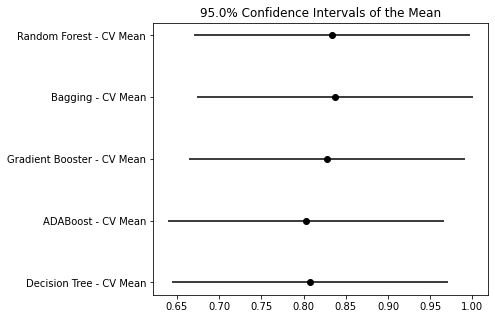

\begin{table}[h]
\centering
\begin{tabular}{lrrl}
\toprule
{} &     M &    SD &              CI \\
\midrule
Random Forest - CV Mean    & 0.834 & 0.177 &  [0.671, 0.998] \\
Bagging - CV Mean          & 0.837 & 0.172 &  [0.674, 1.000] \\
Gradient Booster - CV Mean & 0.827 & 0.167 &  [0.664, 0.991] \\
ADABoost - CV Mean         & 0.803 & 0.165 &  [0.640, 0.967] \\
Decision Tree - CV Mean    & 0.808 & 0.182 &  [0.645, 0.972] \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


In [272]:
res = autorank(meanResults.astype('float64'), verbose = False)
create_report(res)
plot_stats(res, allow_insignificant=1)
plt.show()
latex_table(res)